# Vector data

An actuarial dataset of people, where we consider each person’s age, ZIP code, and income. Each person can be characterized as a vector of 3 values, and thus an entire dataset of 100,000 people can be stored in a rank-2 tensor of shape (100000, 3).

In [1]:
# Lets construct this data to better understand numpy tensors
import numpy as np

#Construct each person features
p1 = np.array([18, 60026, 10000])
p2 = np.array([26, 600110, 20023])
p3 = np.array([32, 60032, 45000])
p4 = np.array([36, 600732, 46000])

In [2]:
people_data = np.array([p1,p2,p3,p4])

In [3]:
# the shape will be 4,3
people_data.shape

(4, 3)

# Timeseries data or sequence data

Whenever time matters in your data (or the notion of sequence order), it makes sense to store it in a rank-3 tensor with an explicit time axis. Each sample can be encoded as a sequence of vectors (a rank-2 tensor), and thus a batch of data will be encoded as a rank-3 tensor (see figure 2.3).

* A dataset of stock prices. Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus every minute is encoded as a 3D vector, an entire day of trading is encoded as a matrix of shape (390, 3) (there are 390 minutes in a trading day), and 250 days' worth of data can be stored in a rank-3 tensor of shape (250, 390, 3). Here, each sample would be one day’s worth of data.

* A dataset of tweets, where we encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters. In this setting, each character can be encoded as a binary vector of size 128 (an all-zeros vector except for a 1 entry at the index corresponding to the character). Then each tweet can be encoded as a rank-2 tensor of shape (280, 128), and a dataset of 1 million tweets can be stored in a tensor of shape (1000000, 280, 128).

<img src="images/ch02-timeseries_data.png" />

In [4]:
# lets get the sample data set in numpy
import random

#.. we can do a for loop to generate dinesh_stock for one day
stock_data = np.empty(((250, 390, 3)))
for d in range(0, 249): # for 250 days
    time_stock = np.empty((390, 3))
    for m in range(0, 389):
        dinesh_stock = np.array([random.randint(0, 40), random.randint(10, 40), random.randint(10, 50)])
        time_stock[m] = (np.array([dinesh_stock]))
    stock_data[d] = np.array([time_stock])
                               

In [5]:
stock_data.shape

(250, 390, 3)

In [6]:
# one day stock value should be of shape (390,3)
print(stock_data[0].shape)

(390, 3)


In [7]:
print(stock_data[0][0].shape)

(3,)


In [8]:
print("current price:",stock_data[0][0][0],"Lowest price:",stock_data[0][0][1],"Higest price:",stock_data[0][0][2])

current price: 3.0 Lowest price: 14.0 Higest price: 14.0


In [9]:
vector_3 = np.array([[[1,1,1],[1,3,3],[1,2,2],[12,2,2]]])

In [10]:
vector_3.shape

(1, 4, 3)

In [11]:
vector_3

array([[[ 1,  1,  1],
        [ 1,  3,  3],
        [ 1,  2,  2],
        [12,  2,  2]]])

# Image data

Images typically have three dimensions: height, width, and color depth.Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in rank-2 tensors, by convention image tensors are always rank-3, with a one-dimensional color channel for grayscale images. A batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3) (see figure 2.4).

<img src="images/ch02-image_data.png" />

There are two conventions for shapes of images tensors: the channels-last convention (which is standard in TensorFlow) and the channels-first convention.

The channels-last convention places the color-depth axis at the end: (samples, height, width, color_depth). Meanwhile, the channels-first convention places the color depth axis right after the batch axis: (samples, color_depth, height, width). With the channels-last convention, the previous examples would become (128, 1, 256, 256) and (128, 3, 256, 256). The Keras API provides support for both formats.

In [41]:
import scipy
import numpy as np

def load_image( infilename ) :
    return np.array(Image.open(infilename))


In [42]:
scipy.__version__

'1.4.1'

In [43]:
# let us prepare this data using real images
image_1 = load_image("image_data/image_1.png")

In [44]:
image_1.shape

(768, 1024, 3)

In [45]:
image_2 = load_image("image_data/image_2.jpg")

In [46]:
image_2.shape

(1300, 1048, 3)

In [47]:
# both the images are in different shape, lets try to add to same np collection
all_image_data = np.array([image_1, image_2])

<ipython-input-47-8be8324a3f4d>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  all_image_data = np.array([image_1, image_2])


In [48]:
# the shape is the numpy hasn't changed as expected. Since both the np arrays are differnt sizes
all_image_data.shape

(2,)

In [49]:
# looks like 
all_image_data[0].shape

(768, 1024, 3)

In [50]:
# looks like 
all_image_data[1].shape

(1300, 1048, 3)

In [92]:
all_image_data[1][700][0].dtype

dtype('uint8')

In [51]:
%matplotlib inline

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

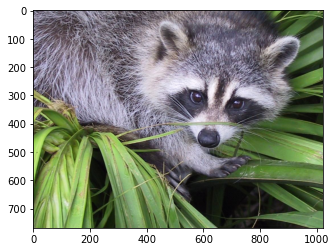

In [53]:
imgplot = plt.imshow(all_image_data[0])

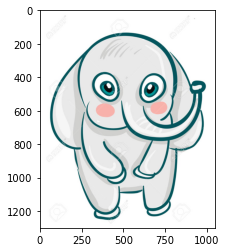

In [54]:
imgplot = plt.imshow(all_image_data[1])

In [55]:
import cv2

In [77]:
# lets resize both the image to same dimenstion. CV expects float32 so convert it
img_res_1 = cv2.resize(image_1.astype('float32'), dsize=(1000, 1000), interpolation = cv2.INTER_NEAREST)
img_res_2 = cv2.resize(image_2.astype('float32'), dsize=(1000, 1000), interpolation = cv2.INTER_NEAREST)

In [78]:
img_res_1.shape

(1000, 1000, 3)

In [79]:
# both the images are in same shape now, lets try to add to same np collection
all_image_data_res = np.array([img_res_1, img_res_2])

In [80]:
all_image_data_res.shape

(2, 1000, 1000, 3)

In [81]:
all_image_data_res[0].shape

(1000, 1000, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


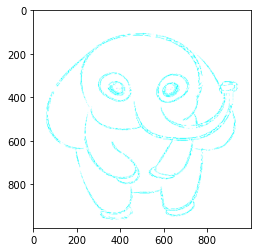

In [82]:
imgplot = plt.imshow(all_image_data_res[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


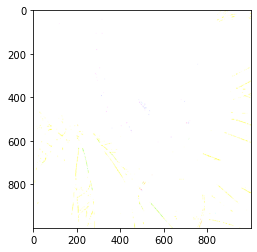

In [83]:
imgplot = plt.imshow(all_image_data_res[0])

# Video data

Video data is one of the few types of real-world data for which you’ll need rank-5 tensors. A video can be understood as a sequence of frames, each frame being a color image. Because each frame can be stored in a rank-3 tensor (height, width, color_depth), a sequence of frames can be stored in a rank-4 tensor (frames, height, width, color_depth), and thus a batch of different videos can be stored in a rank-5 tensor of shape (samples, frames, height, width, color_depth).

For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per second would have 240 frames. A batch of four such video clips would be stored in a tensor of shape (4, 240, 144, 256, 3). That’s a total of 106,168,320 values! If the dtype of the tensor was float32, then each value would be stored in 32 bits, so the tensor would represent 405 MB. Heavy! Videos you encounter in real life are much lighter, because they aren’t stored in float32, and they’re typically compressed by a large factor (such as in the MPEG format).